## Задание 1. A/B–тестирование

### 1.1 Условие

Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

### 1.2 Входные данные

В качестве входных данных Вы имеете 4 csv-файла:

* [groups.csv](https://disk.yandex.ru/d/UhyYx41rTt3clQ) - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа)
* [groups_add.csv](https://disk.yandex.ru/d/5Kxrz02m3IBUwQ) - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
* [active_studs.csv](https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ) - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента.
* [checks.csv](https://disk.yandex.ru/d/pH1q-VqcxXjsVA) - файл с информацией об оплатах пользователей в дни проведения эксперимента.


1.3 Вопросы

Предлагаем Вам ответить на следующие вопросы:

* На какие метрики Вы смотрите в ходе анализа и почему?
* Имеются ли различия в показателях и с чем они могут быть связаны?
* Являются ли эти различия статистически значимыми?
* Стоит ли запускать новую механику на всех пользователей?

Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.

### 1.4 Требования к ответу

* При выполнении тестового задания необходимо использовать язык программирования Python.
* В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными.
* Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

## Задание 1.

Для начала загрузим данные и проведем EDA.

### EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

import requests
from urllib.parse import urlencode


plt.rcParams["figure.figsize"] = (10,5)

In [ ]:
RS = 42

In [ ]:
groups_url = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
groups_add_url = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
active_studs_url = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'
checks_url = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'

Будем использовать функцию для работы с апи Яндекс диска.

In [ ]:
def get_ydisk_url(public_key: str) -> str:
  """Returns url from YandexDisc api"""
  base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
  final_url = base_url + urlencode(dict(public_key=public_key))
  response = requests.get(final_url)
  download_url = response.json()['href']
  return download_url

In [ ]:
groups = pd.read_csv(get_ydisk_url(groups_url), sep=';')
groups_add = pd.read_csv(get_ydisk_url(groups_add_url))
active_studs = pd.read_csv(get_ydisk_url(active_studs_url))
checks = pd.read_csv(get_ydisk_url(checks_url), sep=';')

Посмотрим на наши данные поближе.

In [ ]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [ ]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
groups['grp'].value_counts()

B    59813
A    14671
Name: grp, dtype: int64

In [ ]:
groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [ ]:
groups_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
groups_add['grp'].value_counts()

B    70
A    22
Name: grp, dtype: int64

In [ ]:
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [ ]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [ ]:
active_studs.nunique()

student_id    8341
dtype: int64

In [ ]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [ ]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [ ]:
checks['student_id'].nunique()

541

In [ ]:
checks['rev'].describe()

count     541.000000
mean     1059.752317
std       762.712359
min       199.000000
25%       290.000000
50%       840.000000
75%      1900.000000
max      4650.000000
Name: rev, dtype: float64

Дополним датасет `groups` данными из датасета `groups_add`.



In [ ]:
groups_total = pd.concat([groups, groups_add])
groups_total.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


Проверим длину получившегося датасета.

In [ ]:
groups_total.shape[0] == groups.shape[0] + groups_add.shape[0]

True

In [ ]:
groups_total['grp'].value_counts()

B    59883
A    14693
Name: grp, dtype: int64

Посмотрим на данные по пользователям в разных датасетах, нет ли ошибок.
* Все ли пользователи, которые зашли на платформу попали в общий датасет.
* Есть ли такие пользователи, которые совершили оплату, но не заходили на платформу в дни проведения эксперемента.
* Все ли пользователи, которые совершили оплату есть в общем датасете.

In [ ]:
active_studs.query("student_id not in @groups_total.id").shape[0]

0

In [ ]:
checks.query("student_id not in @active_studs.student_id").shape[0]

149

In [ ]:
checks.query("student_id not in @groups_total.id").shape[0]

0

### Выводы на основе EDA

Есть 149 пользователей, которые не заходили на платформу, но совершили оплату, возможно это ошибки в данных или оплата подписки (если такая модель монетизации есть в нашем сервисе). Этих пользователей учитывать не будем, так как они не посещали сайт и не взаимодействовали с изменениями в механике оплаты.

Стоит выделить пользователей в 2 группы:
1. Пользователи активные и совершившие оплату на сайте.
2. Активные пользователи не совершавшие оплату на сайте.

Такое разделение нам поможет в расчете метрик и проведении А/Б теста. Объединим наши датасеты с учетом выделенных групп и обнаруженных ошибках/особенностях в данных.

Для начала объединим данные активных пользователей и тех кто оплатил, сразу отбросив id пользователей не посещавших сайт.

In [ ]:
active_pay_users = active_studs.merge(checks,
                                      how='left',
                                      on='student_id')
active_pay_users.head()

,student_id,rev
0,581585,NaN
1,5723133,NaN
2,3276743,NaN
3,4238589,NaN
4,4475369,NaN


Теперь объеденим с датасетом `groups_total`, где пользователи разделены на контрольную и тестовую группы.

In [ ]:
active_pay_users.rename(columns={'student_id': 'id'}, inplace=True)

In [ ]:
active_pay_users = active_pay_users.merge(groups_total,
                       how='left',
                       on='id')
active_pay_users.head()

,id,rev,grp
0,581585,NaN,A
1,5723133,NaN,A
2,3276743,NaN,B
3,4238589,NaN,A
4,4475369,NaN,B


In [ ]:
active_pay_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      8341 non-null   int64  
 1   rev     392 non-null    float64
 2   grp     8341 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 260.7+ KB


Для удобства добавим колонку с булевым значением платил пользователь на сайте или нет и заменим `NaN` на `0`.

In [ ]:
active_pay_users.fillna(0, inplace=True)

In [ ]:
active_pay_users['payment'] = active_pay_users['rev'] > 0
active_pay_users.head()

,id,rev,grp,payment
0,581585,0.0,A,False
1,5723133,0.0,A,False
2,3276743,0.0,B,False
3,4238589,0.0,A,False
4,4475369,0.0,B,False


Взглянем на количество пользователей по группам.

Активные пользователи по группам (входят все пользователи заходившие на сайт во время проведения А/В теста).

In [ ]:
active_pay_users['grp'].value_counts()

B    6803
A    1538
Name: grp, dtype: int64

Активные **совершившие оплату** пользователи по группам (входят пользователи заходившие на сайт и совершившие оплату во время проведения А/В теста).

In [ ]:
active_pay_users[active_pay_users['payment'] == 1]['grp'].value_counts()

B    314
A     78
Name: grp, dtype: int64

Группа А с активными пользователями совершившими оплату.

In [ ]:
active_pay_A = active_pay_users.query('payment == 1 & grp == "A"')
active_pay_A.head()

,id,rev,grp,payment
62,1184303,1530.0,A,True
99,720651,1980.0,A,True
306,4337103,580.0,A,True
392,332387,2910.0,A,True
439,1659434,690.0,A,True


Группа B с активными пользователями совершившими оплату.

In [ ]:
active_pay_B = active_pay_users.query('payment == 1 & grp == "B"')
active_pay_B.head()

,id,rev,grp,payment
67,3354191,1900.0001,B,True
77,3278734,1900.0000,B,True
193,1232221,1900.0000,B,True
195,3821501,1900.0000,B,True
211,1036096,1900.0000,B,True


Группа А с активными пользователями.

In [ ]:
active_A = active_pay_users.query('grp == "A"')
active_A.head()

,id,rev,grp,payment
0,581585,0.0,A,False
1,5723133,0.0,A,False
3,4238589,0.0,A,False
7,1394612,0.0,A,False
21,5194768,0.0,A,False


Группа B с активными пользователями.

In [ ]:
active_B = active_pay_users.query('grp == "B"')
active_B.head()

,id,rev,grp,payment
2,3276743,0.0,B,False
4,4475369,0.0,B,False
5,5481015,0.0,B,False
6,1353433,0.0,B,False
8,1170611,0.0,B,False


### Сравнение распределений по группам

Сравнение распределений активных пользователей.

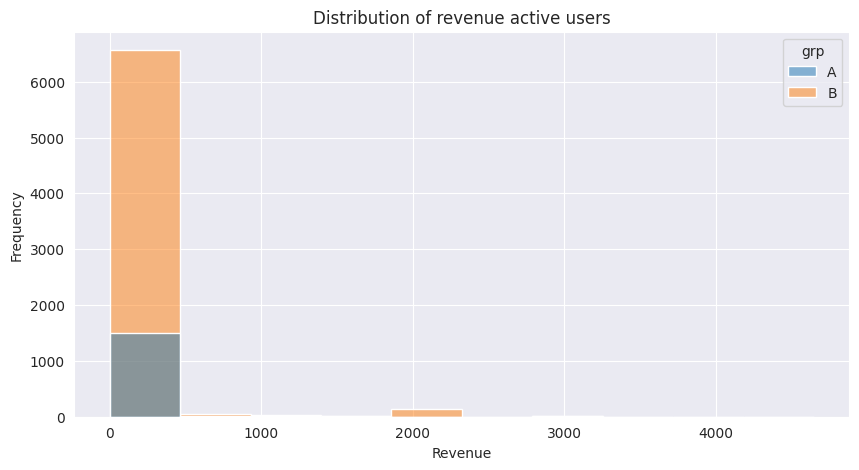

In [ ]:
sns.set_style('darkgrid')
sns.histplot(data=active_pay_users, x='rev', hue='grp', bins=10)
plt.title('Distribution of revenue active users')
plt.xlabel('Revenue')
plt.ylabel('Frequency');

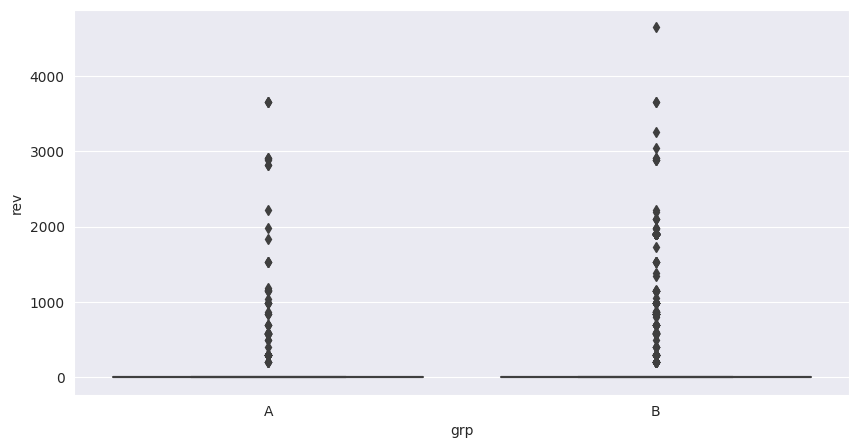

In [ ]:
sns.boxplot(data=active_pay_users, x='grp', y='rev');

Проверим распределения на нормальность.

In [ ]:
_, p_val = ss.normaltest(active_A['rev'])
if(p_val < 0.05):
    print(f'p-value: {p_val}\nNot normal distribution')

p-value: 0.0
Not normal distribution


In [ ]:
_, p_val = ss.normaltest(active_B['rev'])
if(p_val < 0.05):
    print(f'p-value: {p_val}\nNot normal distribution')

p-value: 0.0
Not normal distribution


Сравнение распределений активных пользователей, совершивших оплату.

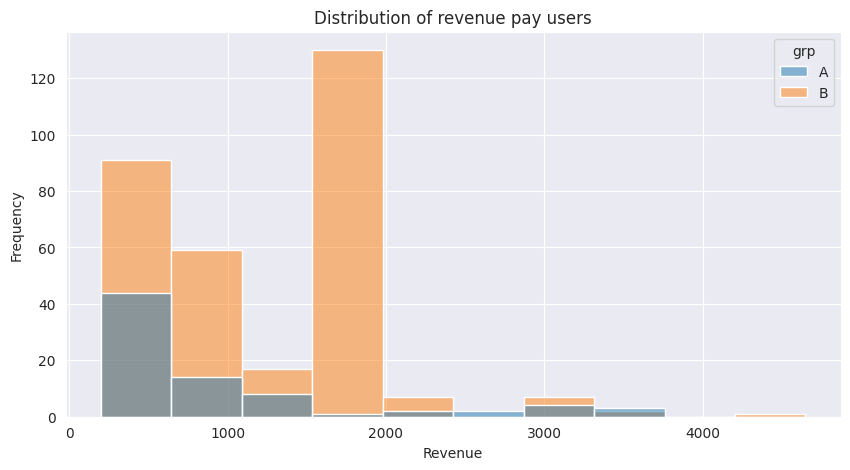

In [ ]:
sns.histplot(data=active_pay_users.query('payment == 1'),
             x='rev',
             hue='grp',
             bins=10)
plt.title('Distribution of revenue pay users')
plt.xlabel('Revenue')
plt.ylabel('Frequency');

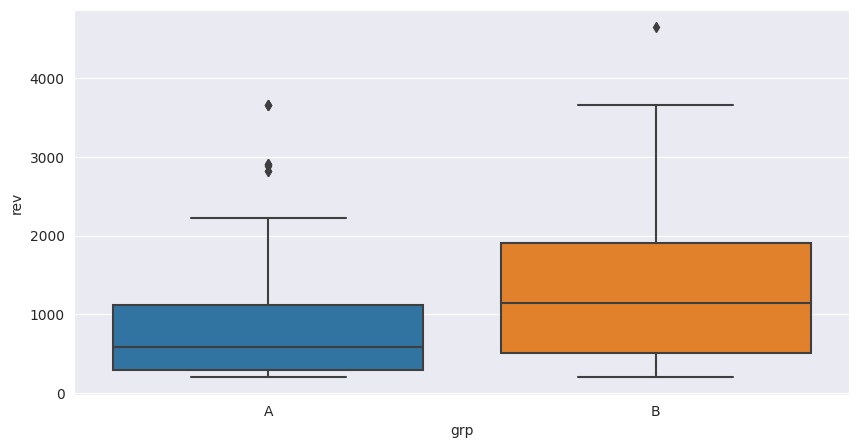

In [ ]:
sns.boxplot(data=active_pay_users.query('payment == 1'), x='grp', y='rev');

По графикам и тестам на нормальность видно что распределения не нормальны, так же можно заметить что на графике пользователей совершивших оплату, сильно отличается количество пользователей в эксперементальной и контрольной группе потративших сумму примерно `1900`. Это может косвено указывать на различия в группах.

Проверим распределения на нормальность.

In [ ]:
_, p_val = ss.normaltest(active_pay_A['rev'])
if(p_val < 0.05):
    print(f'p-value: {p_val}\nNot normal distribution')

p-value: 2.531686880422046e-07
Not normal distribution


In [ ]:
_, p_val = ss.normaltest(active_pay_B['rev'])
if(p_val < 0.05):
    print(f'p-value: {p_val}\nNot normal distribution')

p-value: 0.033445723194625424
Not normal distribution


### Определение основных метрик

Для начала нам нужно выделить основные метрики, которые интересуют бизнес и проверить как они изменились за время проведения эксперимента. Мы проверяем как повлияло изменение механики оплаты на доход нашей компании, соответственно основными будут метрики связанные с выручкой:

* `ARPU` - является ключевой метрикой для измерения общей эффективности монетизации. Она показывает средний доход, который мы получаем с каждого активного пользователя. Увеличение `ARPU` означает, что мы увеличиваете средний доход с каждой успешной транзакции.

* `ARPPU` - фокусируется на доходе от платящих пользователей, и она дополняет `ARPU`, учитывая только тех пользователей, которые совершили покупку. Она позволяет оценить доходность базы платящих клиентов.

* `CR` - измеряет, сколько пользователей, посетивших сайт, фактически совершили покупку. Это важная метрика для измерения эффективности платформы в превращении посетителей в клиентов.

Посчитаем указанные метрики.

In [ ]:
print(f"ARPU в группе А: {active_A['rev'].mean():.2f}\n"
      f"ARPU в группе В: {active_B['rev'].mean():.2f}")

ARPU в группе А: 47.35
ARPU в группе В: 58.06


In [ ]:
print(f"ARPPU в группе А: {active_pay_A['rev'].mean():.2f}\n"
      f"ARPPU в группе В: {active_pay_B['rev'].mean():.2f}")

ARPPU в группе А: 933.59
ARPPU в группе В: 1257.88


In [ ]:
print(f"CR в группе А: {(active_pay_A['id'].count() / active_A['id'].count()):.2%}\n"
      f"CR в группе В: {(active_pay_B['id'].count() / active_B['id'].count()):.2%}")

CR в группе А: 5.07%
CR в группе В: 4.62%


### Выбор статтестов и определение гипотез.

Мы видим что метрики в контрольной и эксперементальной группе отличаются: `ARPU` и `ARPPU` выросли для эксперементальной группы, а `CR` снизился.
Новая механика оплаты могла стимулировать пользователей совершать более крупные покупки, что в конечном итоге увеличило средний доход на пользователя и средний доход на платящего пользователя. В тоже время новая механика оплаты могла включать более высокие цены или другие условия оплаты, что сделало бы совершение покупок менее привлекательным для пользователей. Это могло привести к снижению конверсии.

Чтобы проверить являются ли различия в группах статистически значимы будем использовать бутстрэп для метрик `ARPU` и `ARPPU`, для `CR` используем хи-квадрат.

Поскольку распределения метрик `ARPU` и `ARPPU` ненормальные и имеют выбросы, классические параметрические методы могут быть менее надежными. Бутстрэп позволяет оценивать распределение исследуемой статистики без предположений о нормальности и может обеспечить более точные оценки доверительных интервалов и стандартных ошибок в условиях ненормальных распределений и выбросов.

Метрика `CR` является дискретной и категориальной, поскольку измеряет процентное соотношение. Метод хи-квадрат хорошо подходит для анализа зависимости между категориальными переменными и может использоваться для оценки значимости различий между группами в случае метрик типа `CR`.
Критерий Хи-квадрат также позволяет оценить, есть ли статистически значимая зависимость между двумя категориальными переменными, что может помочь определить, действительно ли изменение механики оплаты оказало влияние на снижение `CR`.

Гипотеза для ARPU и ARPPU:

Нулевая гипотеза (H0): Новая механика оплаты не имеет значимого влияния на средний доход на пользователя (ARPU) и средний доход на платящего пользователя (ARPPU).

Альтернативная гипотеза (H1): Новая механика оплаты приводит к статистически значимому увеличению среднего дохода на пользователя (ARPU) и среднего дохода на платящего пользователя (ARPPU).

Гипотеза для CR:

Нулевая гипотеза (H0): Новая механика оплаты не оказывает значимого влияния на коэффициент конверсии (CR), и изменения случайны.

Альтернативная гипотеза (H1): Новая механика оплаты приводит к статистически значимому снижению коэффициента конверсии (CR).

ARPPU.

In [ ]:
def mean_dff(group_a, group_b):
  return np.mean(group_b) - np.mean(group_a)

In [ ]:
res = ss.bootstrap((active_pay_A['rev'], active_pay_B['rev']),
                   mean_dff, confidence_level=.95,
                   random_state=RS,
                   vectorized=False)

In [ ]:
mean_diff = res.bootstrap_distribution
conf_interval = (res.confidence_interval.low, res.confidence_interval.high)

In [ ]:
def plot_distrib(data, conf_interval, metric):
  ax = sns.histplot(data)
  ax.axvline(conf_interval[0], linestyle='dashed', color='orangered')
  ax.axvline(conf_interval[1], linestyle='dashed', color='orangered')
  ax.axvspan(data.min(), conf_interval[0], color='orangered', alpha=0.2)
  ax.axvspan(data.max(), conf_interval[1], color='orangered', alpha=0.2)
  ax.set_xlim(data.min(), data.max())
  ax.set_xlabel(f'{metric} differences')
  ax.set_ylabel('frequency')
  ax.set_title(f'Bootstrapped {metric}')
  sns.despine()

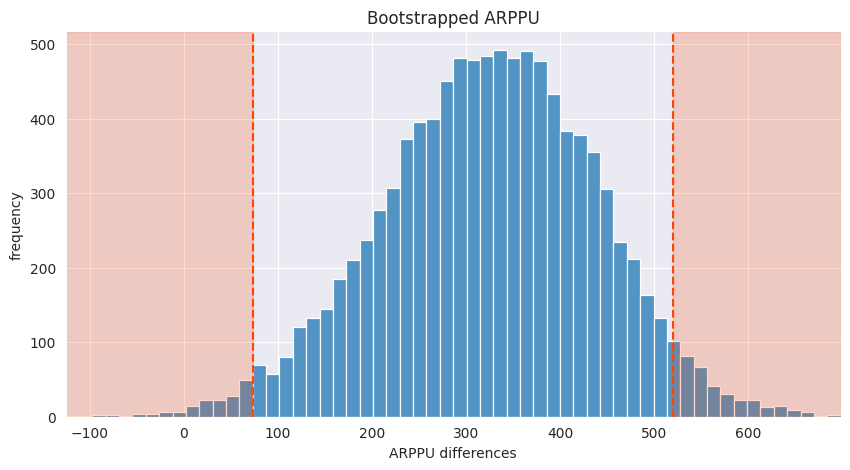

In [ ]:
plot_distrib(mean_diff, conf_interval, 'ARPPU')

Мы видим на графике что 0 **не попадает** в доверительный интервал, соответственно мы можем отклонить Н0 - `ARPPU` в группах различается.

ARPU.

In [ ]:
res = ss.bootstrap((active_A['rev'], active_B['rev']),
                   mean_dff, confidence_level=.95,
                   random_state=RS,
                   vectorized=False)

In [ ]:
mean_diff = res.bootstrap_distribution
conf_interval = (res.confidence_interval.low, res.confidence_interval.high)

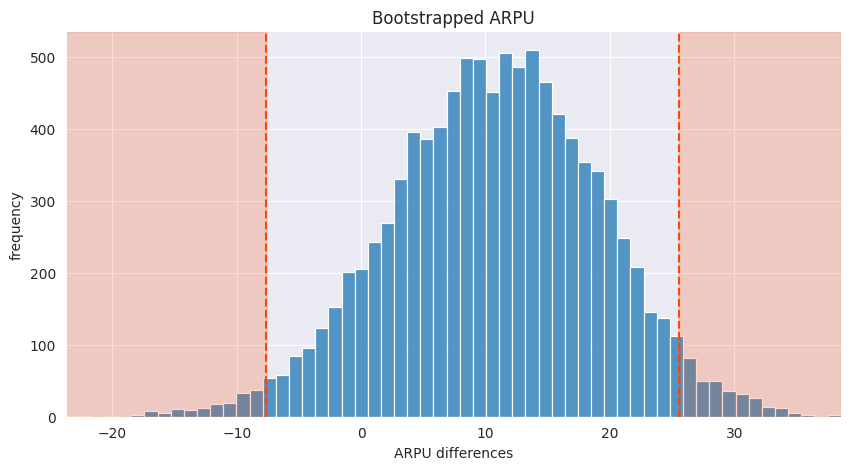

In [ ]:
plot_distrib(mean_diff, conf_interval, 'ARPU')

Мы видим на графике что 0 **попадает** в доверительный интервал, соответственно мы **не можем отклонить Н0**.

CR.

In [ ]:
cross_tab = pd.crosstab(active_pay_users['grp'], active_pay_users['payment'])
cross_tab

payment,False,True
grp,,
A,1460,78
B,6489,314


In [ ]:
print(f'p_value = {ss.chi2_contingency(cross_tab).pvalue}')

p_value = 0.48625240457231045


Значение p-value > 0.05 - соответственно у нас нет оснований отклонить нулевую гипотезу.

### Выводы по результатам эксперимента.

Исходя из результатов A/B-теста, можно сделать следующие выводы:

* Внедрение новой механики оплаты оказало положительное влияние на средний доход на платящего пользователя (ARPPU).
* Новая механика оплаты не оказала статистически значимого влияния на коэффициент конверсии (CR).
* Средний доход на пользователя (ARPU) остался практически неизменным.

В целом, изменения в механике оплаты могут быть рекомендованы для внедрения, так как они привели к увеличению среднего дохода на платящего пользователя, не затронув при этом конверсию и средний доход на пользователя.